# Fashion MNIST Classification using Convolutional Neural Networks
## Tensorflow-Keras

In [19]:
## Suppress useless warnings
import warnings
warnings.filterwarnings('ignore')

In [20]:
import os
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.contrib.tensorboard.plugins import projector

%matplotlib inline

## Load the fashion-mnist train & test data

In [21]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


## Create a 20% validation split from training data

In [22]:
# create a validation set with 20 percent examples from training set
x_train, x_validate, y_train, y_validate = train_test_split(x_train, y_train, test_size=0.2, random_state=12345)

## Data Normalization

In [23]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Add the color channel axis for Keras operations.
x_train = x_train[..., np.newaxis]
x_validate = x_validate[..., np.newaxis]
x_test = x_test[..., np.newaxis]

## Create Label Dictionary

In [24]:
label_dict = {
    0: 'T-shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}

## Data Visualization

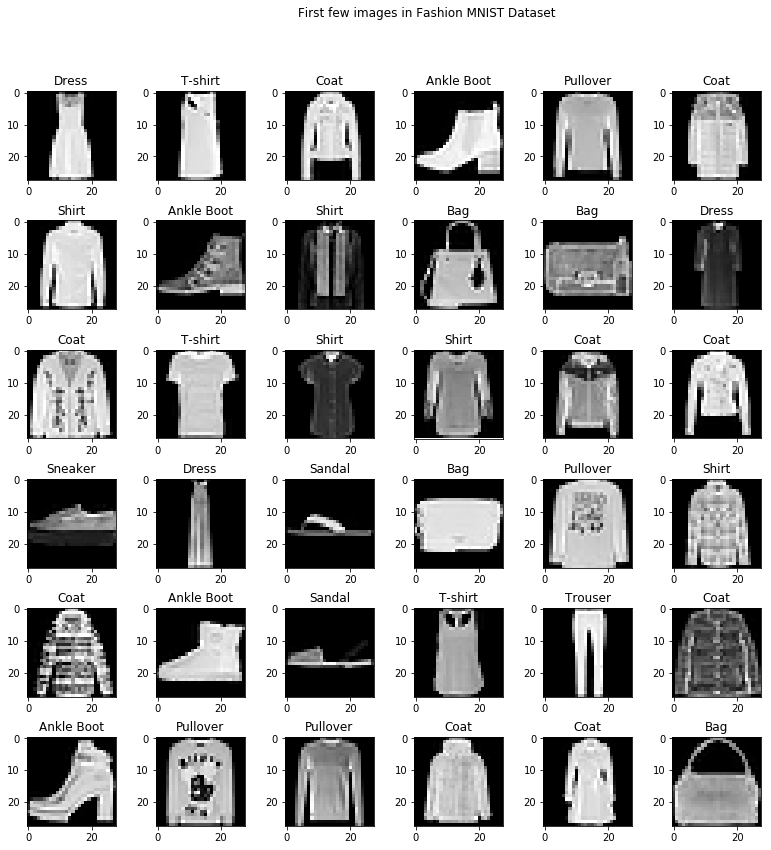

In [25]:
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First few images in Fashion MNIST Dataset')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
    title = label_dict[int(y_train[x + y * 6])]
    ax[x, y].set_title(title)

## CNN Model Definition

In [26]:
# Input image dimension:
# WxHxC where W is the Width, H is the Height and C is the number of color channels
img_dim = (x_train[0].shape[0], x_train[0].shape[1], 1)
print("Input image dimension: ", img_dim)

# Define hyper-parameters
batch_size = 128
num_epochs = 10
num_classes = 10

Input image dimension:  (28, 28, 1)


In [27]:
# Create a Keras Sequential model
model = tf.keras.Sequential()

# Input Convolution layer, f-64, k-2, p-same, a-relu
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=img_dim))

# Max Pooling Layer, p2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Dropout of 0.3
model.add(tf.keras.layers.Dropout(0.3))

# Convolution layer, f-32, k-2, p-same, a-relu
model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))

# # Max Pooling Layer, p2
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))

# Dropout of 0.3
model.add(tf.keras.layers.Dropout(0.3))

# Flatten the activations of previous layer
model.add(tf.keras.layers.Flatten())

# Fully connected dense layer, fc-256, a-relu
model.add(tf.keras.layers.Dense(256, activation='relu'))

# Dropout of 0.5
model.add(tf.keras.layers.Dropout(0.5))

# Fully connected dense layer, fc-num_classes, a-softmax
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

# Take a look at the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

## Basic Convolution Operation

<img src="data/convolution_basic.gif">

## Convolution Operation on RGB images using 3D kernel

<img src="data/convolution.gif">

In [28]:
# Initialize a dictionary to save the training history
history_dict = {}

# Compile the CNN model
# We are using here sparse_categorical_crossentropy loss function and Adam optimizer.
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

history = model.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs, verbose=1,
    validation_data=(x_validate, y_validate)
    )

history_dict['first_model'] = history

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.6888 - acc: 0.7451 - val_loss: 2.2345 - val_acc: 0.8577
Epoch 2/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4531 - acc: 0.8322 - val_loss: 1.9336 - val_acc: 0.8761
Epoch 3/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.4044 - acc: 0.8531 - val_loss: 1.7887 - val_acc: 0.8858
Epoch 4/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.3731 - acc: 0.8646 - val_loss: 1.6359 - val_acc: 0.8952
Epoch 5/10
48000/48000 [==============================] - 54s 1ms/step - loss: 0.3546 - acc: 0.8700 - val_loss: 1.6636 - val_acc: 0.8937
Epoch 6/10
48000/48000 [==============================] - 55s 1ms/step - loss: 0.3337 - acc: 0.8771 - val_loss: 1.5248 - val_acc: 0.9027
Epoch 7/10
48000/48000 [==============================] - 53s 1ms/step - loss: 0.3242 - acc: 0.8814 - val_loss: 1.5439 - val_acc

## Plot the Validation accuracy and loss curves

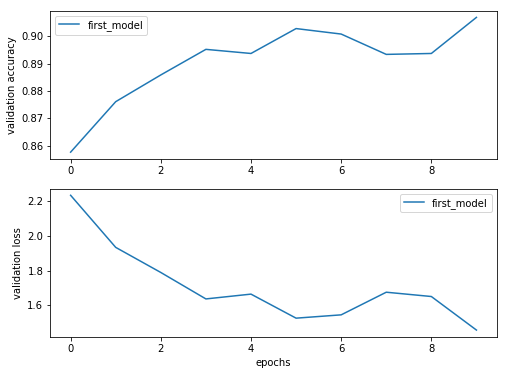

In [29]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

## Plot and compare validation and training curves

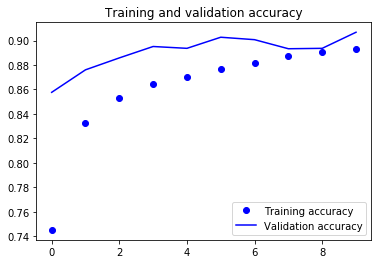

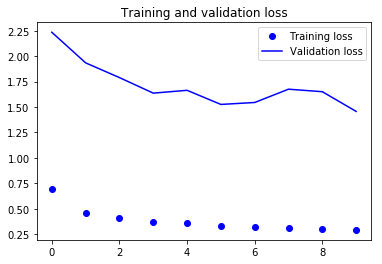

In [30]:
accuracy = history_dict[history].history['acc']
val_accuracy = history_dict[history].history['val_acc']
loss = history_dict[history].history['loss']
val_loss = history_dict[history].history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluate the model on a test set (not seen by the network)

In [31]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#get the predictions for the test data
predicted_classes = model.predict_classes(x_test)

#get the indices to be plotted
#y_true = test_df.iloc[:, 0]
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

Test loss: 0.26994686102867127
Test accuracy: 0.9007
             precision    recall  f1-score   support

    Class 0       0.82      0.89      0.86      1000
    Class 1       0.99      0.98      0.98      1000
    Class 2       0.76      0.91      0.83      1000
    Class 3       0.89      0.91      0.90      1000
    Class 4       0.85      0.79      0.82      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.81      0.63      0.71      1000
    Class 7       0.94      0.98      0.96      1000
    Class 8       0.98      0.98      0.98      1000
    Class 9       0.99      0.95      0.97      1000

avg / total       0.90      0.90      0.90     10000



## Save the model

In [34]:
model.save(filepath='./fashion_mnist_model.h5')

## Load the model later

In [35]:
model_loaded = tf.keras.models.load_model('./fashion_mnist_model.h5')

## View the loaded model

In [36]:
model_loaded.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 32)        8224      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 32)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1568)              0         
__________

## Confirm that the saved model works

In [37]:
score = model_loaded.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#get the predictions for the test data
predicted_classes = model_loaded.predict_classes(x_test)

#get the indices to be plotted
#y_true = test_df.iloc[:, 0]
y_true = y_test
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))

Test loss: 0.26994686102867127
Test accuracy: 0.9007
             precision    recall  f1-score   support

    Class 0       0.82      0.89      0.86      1000
    Class 1       0.99      0.98      0.98      1000
    Class 2       0.76      0.91      0.83      1000
    Class 3       0.89      0.91      0.90      1000
    Class 4       0.85      0.79      0.82      1000
    Class 5       0.98      0.98      0.98      1000
    Class 6       0.81      0.63      0.71      1000
    Class 7       0.94      0.98      0.96      1000
    Class 8       0.98      0.98      0.98      1000
    Class 9       0.99      0.95      0.97      1000

avg / total       0.90      0.90      0.90     10000



## Find embeddings for PCA and tSNE dimensionality reduction

In [ ]:
test_data = np.array(pd.read_csv('data/fashion-mnist_test.csv'), dtype='float32')

embed_count = 900
x_test = test_data[:embed_count, 1:] / 255
y_test = test_data[:embed_count, 0]

logdir = os.getcwd()+'/fmnist_embedding_logdir/' #change this

# setup the write and embedding tensor

summary_writer = tf.summary.FileWriter(logdir)

embedding_var = tf.Variable(x_test, name='fmnist_embedding')

config = projector.ProjectorConfig()
embedding = config.embeddings.add()
embedding.tensor_name = embedding_var.name

embedding.metadata_path = logdir + 'metadata.tsv'
embedding.sprite.image_path = logdir + 'sprite.png'
embedding.sprite.single_image_dim.extend([28, 28])

projector.visualize_embeddings(summary_writer, config)

# run the sesion to create the model check point

with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    saver = tf.train.Saver()
    saver.save(sesh, logdir + 'model.ckpt')
    
    
# create the sprite image and the metadata file

rows = 28
cols = 28

label = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boot']

sprite_dim = int(np.sqrt(x_test.shape[0]))

sprite_image = np.ones((cols * sprite_dim, rows * sprite_dim))

index = 0
labels = []
for i in range(sprite_dim):
    for j in range(sprite_dim):
        
        labels.append(label[int(y_test[index])])
        
        sprite_image[
            i * cols: (i + 1) * cols,
            j * rows: (j + 1) * rows
        ] = x_test[index].reshape(28, 28) * -1 + 1
        
        index += 1
        
with open(embedding.metadata_path, 'w') as meta:
    meta.write('Index\tLabel\n')
    for index, label in enumerate(labels):
        meta.write('{}\t{}\n'.format(index, label))
        
plt.imsave(embedding.sprite.image_path, sprite_image, cmap='gray')
plt.imshow(sprite_image, cmap='gray')
plt.show()

For TensorBoard PCA and tSNE visualization, run this in a new terminal:

**tensorboard --port 8889 --logdir ./fmnist_embedding_logdir/**

After you run this in a terminal, in a new tab go to **yourIP:8889**.

## Assignment

In [ ]:
# Create a Keras Sequential model
model2 = 

# Input Convolution layer, f-128, k-2, p-same, a-relu

# Max Pooling Layer, p2

# Dropout of 0.25

# Input Convolution layer, f-64, k-2, p-same, a-relu

# Max Pooling Layer, p2

# Dropout of 0.25

# Convolution layer, f-32, k-2, p-same, a-relu

# # Max Pooling Layer, p2

# Dropout of 0.3

# Flatten the activations of previous layer

# Fully connected dense layer, fc-256, a-relu

# Dropout of 0.5

# Fully connected dense layer, fc-num_classes, a-softmax

# Take a look at the model summary
model.summary()

In [ ]:
# Initialize a dictionary to save the training history
history_dict = {}

# Compile the CNN model
# We are using here sparse_categorical_crossentropy loss function and Adam optimizer.
model2.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
    )

history = model2.fit(
    x_train, y_train,
    batch_size=batch_size,
    epochs=num_epochs, verbose=1,
    validation_data=(x_validate, y_validate)
    )

history_dict['second_model'] = history

## Plot the Validation accuracy and loss curves

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(8, 6))

for history in history_dict:
    val_acc = history_dict[history].history['val_acc']
    val_loss = history_dict[history].history['val_loss']
    ax1.plot(val_acc, label=history)
    ax2.plot(val_loss, label=history)
    
ax1.set_ylabel('validation accuracy')
ax2.set_ylabel('validation loss')
ax2.set_xlabel('epochs')
ax1.legend()
ax2.legend()
plt.show()

## Plot and compare validation and training curves

In [ ]:
accuracy = history_dict[history].history['acc']
val_accuracy = history_dict[history].history['val_acc']
loss = history_dict[history].history['loss']
val_loss = history_dict[history].history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Evaluate the model on a test set (not seen by the network)

In [ ]:
score = model2.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

#get the predictions for the test data
predicted_classes = model2.predict_classes(x_test)

#get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(num_classes)]
print(classification_report(y_true, predicted_classes, target_names=target_names))